<a href="https://colab.research.google.com/github/charanjvs/DIABETES_PATIENTS/blob/main/Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.datasets import make_classification

In [ ]:
#load the dataset

diabetes_df = pd.read_csv('diabetes.csv')

In [ ]:
diabetes_df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
diabetes_df.tail(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [ ]:
diabetes_df.shape

(768, 9)

In [ ]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
#check missing values

diabetes_df.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [ ]:
import pandas as pd

# Assuming diabetes_df is your DataFrame
# Replace 0 with NaN in the specified columns using mask
diabetes_df[columns_with_zeros] = diabetes_df[columns_with_zeros].mask(diabetes_df[columns_with_zeros] == 0)

# Check the number of missing values per column
missing_values = diabetes_df.isna().sum()

print(missing_values)

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [ ]:
# Convert pandas NA to numpy nan for compatibility
diabetes_df = diabetes_df.replace({pd.NA: np.nan})

# Impute missing values using median for Glucose, BloodPressure, and BMI
for column in ['Glucose', 'BloodPressure', 'BMI']:
    diabetes_df[column].fillna(diabetes_df[column].median(), inplace=True)

# Check the number of missing values after median imputation
missing_values_after_median = diabetes_df.isna().sum()
print(missing_values_after_median)


# Use KNNImputer to fill missing values for 'SkinThickness' and 'Insulin'
knn_imputer = KNNImputer(n_neighbors=5)  # You can adjust the number of neighbors if needed
diabetes_df[['SkinThickness', 'Insulin']] = knn_imputer.fit_transform(diabetes_df[['SkinThickness', 'Insulin']])

Pregnancies                   0
Glucose                       0
BloodPressure                 0
SkinThickness               227
Insulin                     374
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [ ]:
# Check the number of missing values after k-NN imputation
missing_values_after_knn = diabetes_df.isna().sum()
print(missing_values_after_knn)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


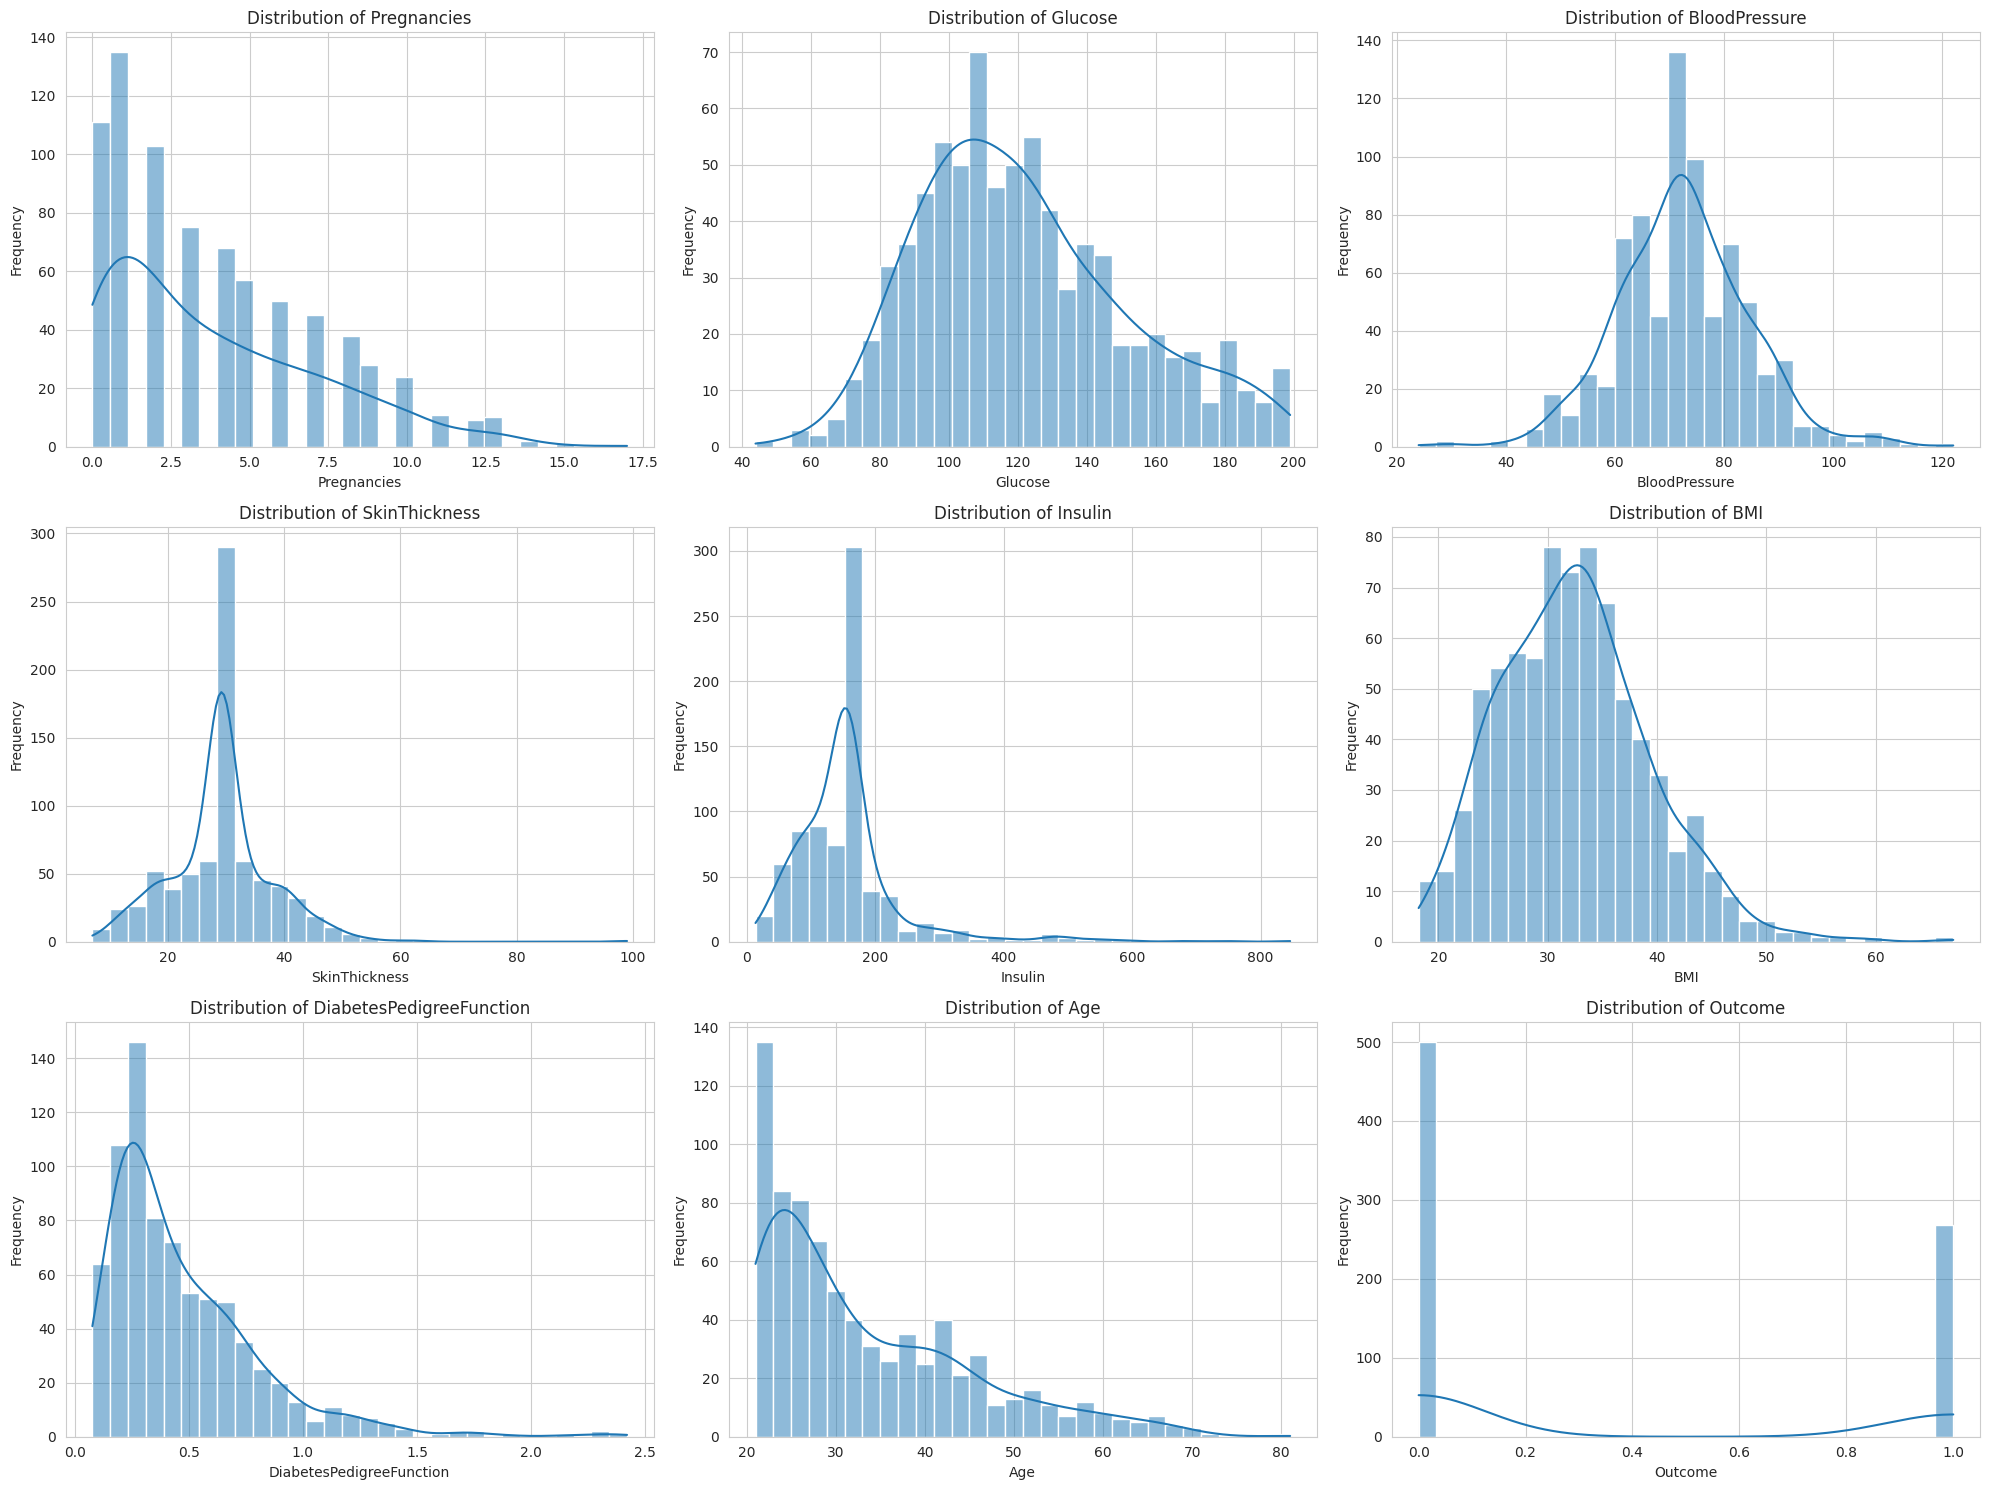

In [ ]:
# Set the style for seaborn plots
sns.set_style("whitegrid")

# Initialize the figure
plt.figure(figsize=(20, 15))

# Plot histograms for each variable
for i, column in enumerate(diabetes_df.columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(diabetes_df[column], bins=30, kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

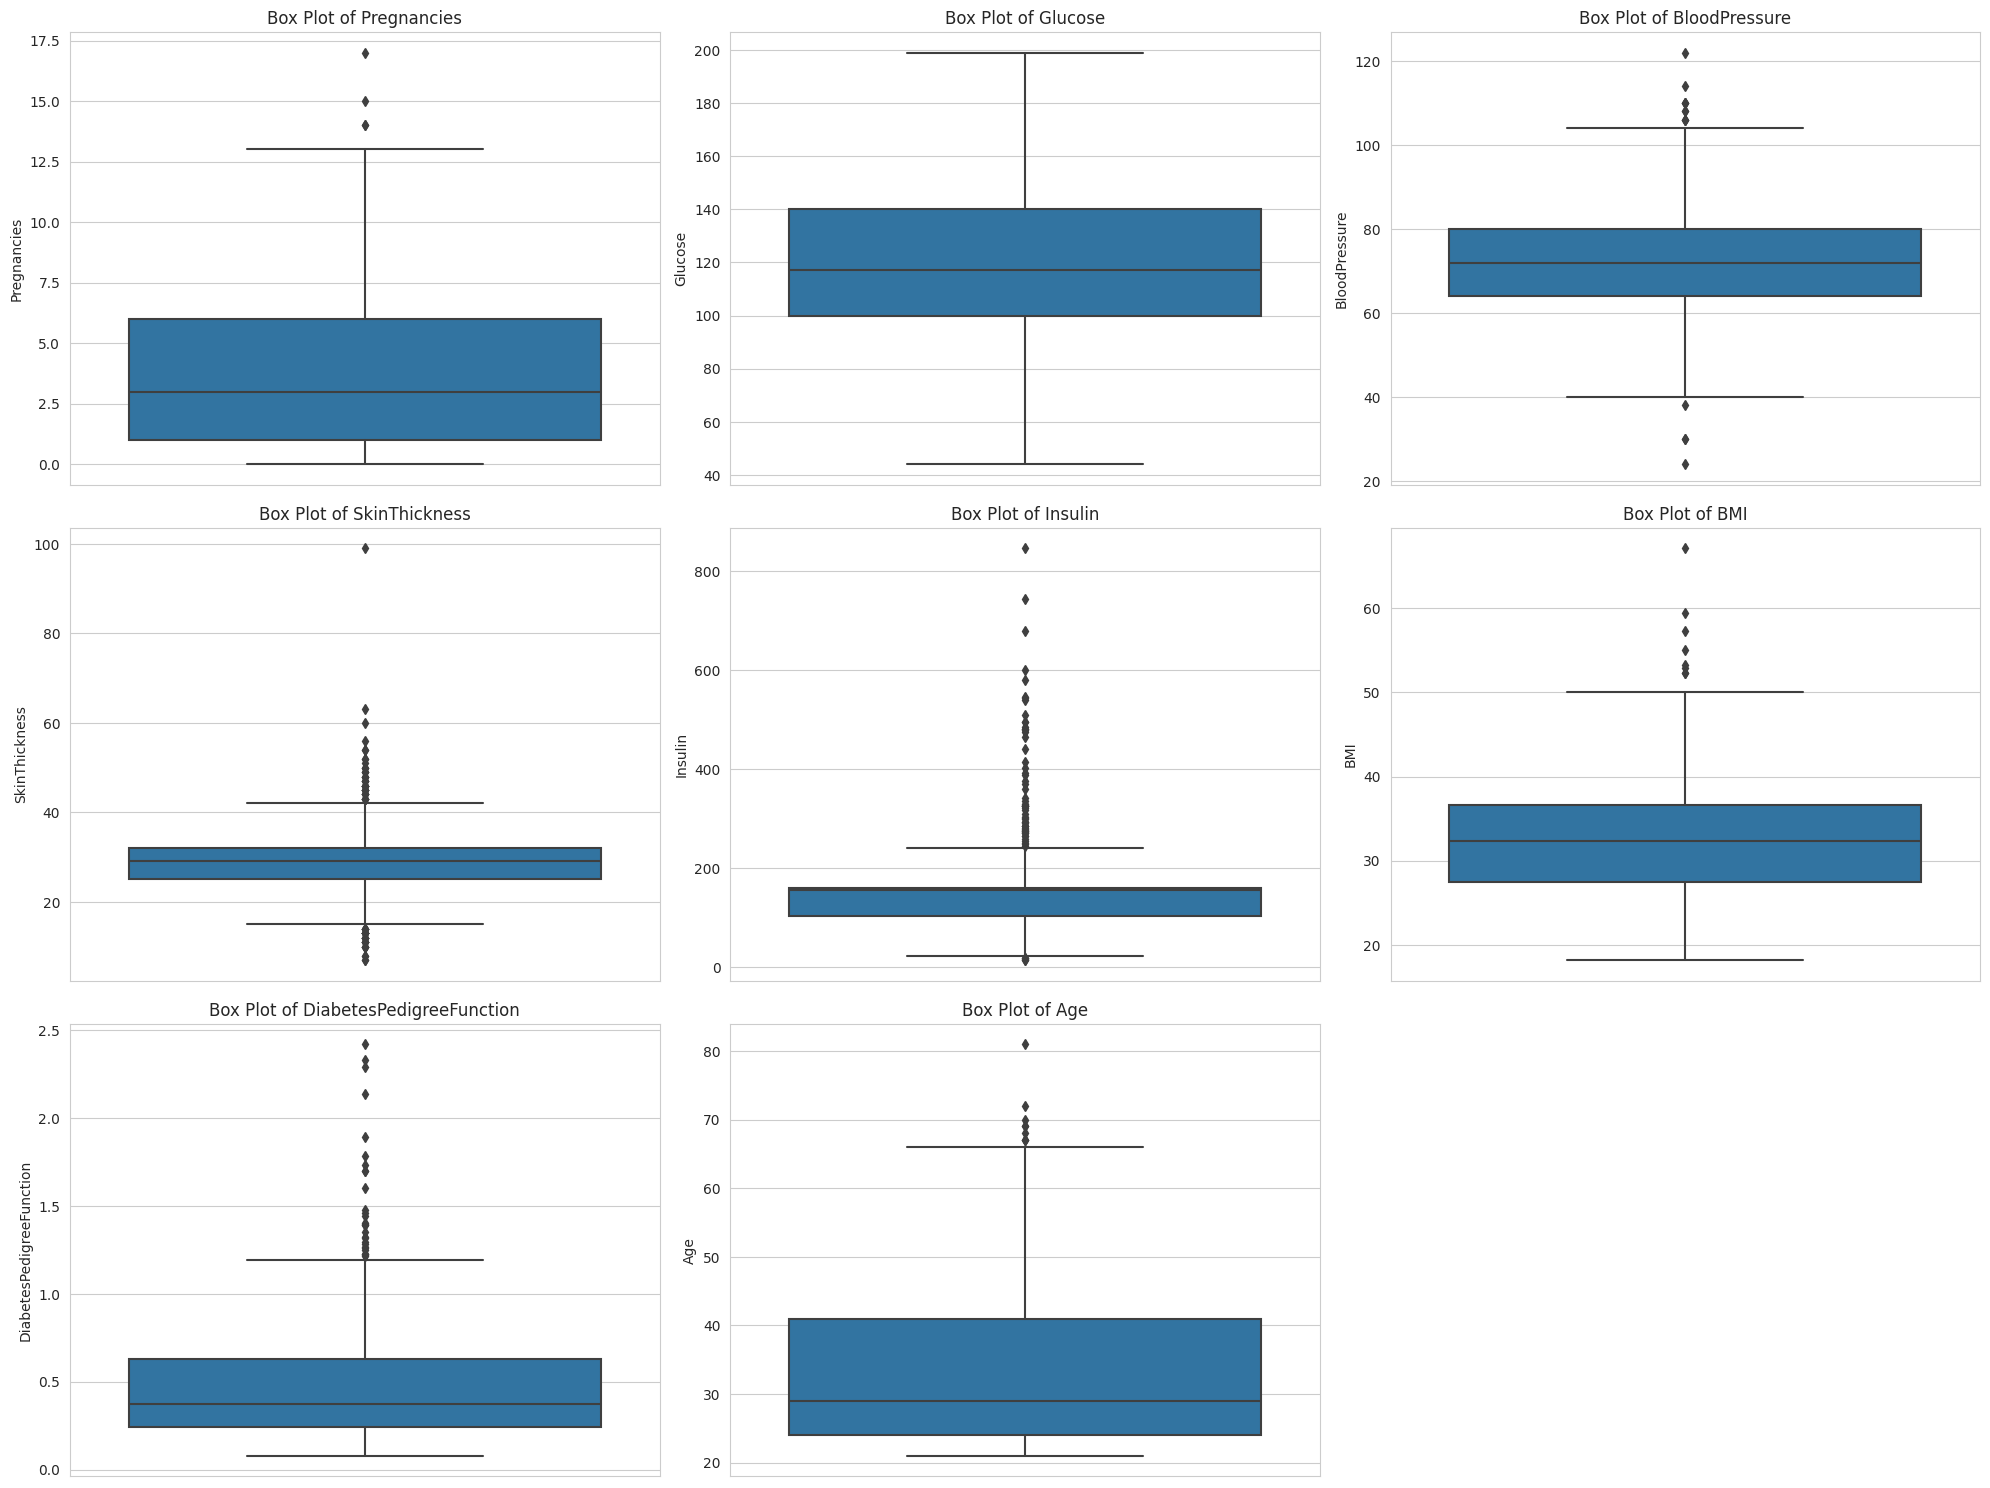

In [ ]:
# Initialize the figure for box plots
plt.figure(figsize=(20, 15))

# Plot box plots for each variable (excluding Outcome)
for i, column in enumerate(diabetes_df.columns[:-1], 1):  # Exclude 'Outcome' for box plots
    plt.subplot(3, 3, i)
    sns.boxplot(y=diabetes_df[column])
    plt.title(f'Box Plot of {column}')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

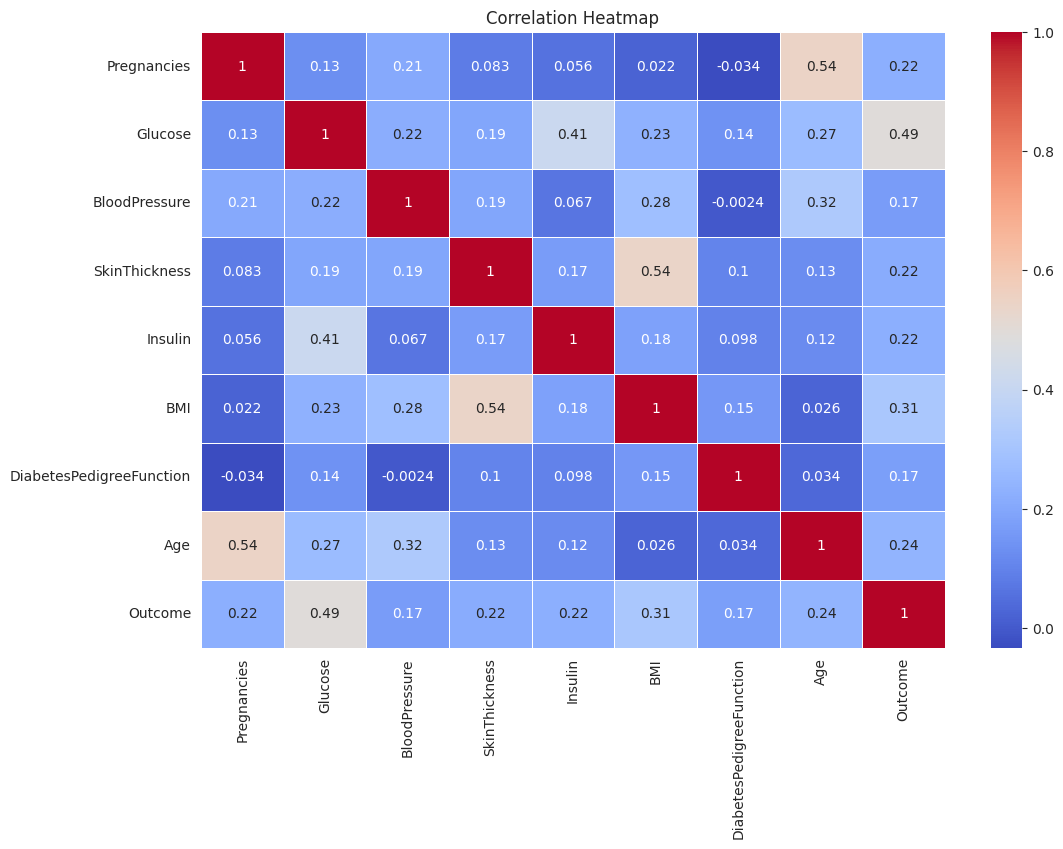

In [ ]:
# Compute correlation matrix
correlation_matrix = diabetes_df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
# Define features (X) and target (y)
X = diabetes_df.drop('Outcome', axis=1)
y = diabetes_df['Outcome']

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

((614, 8), (154, 8))

In [ ]:
# Initialize and train a Logistic Regression model
logreg_model = LogisticRegression(max_iter=1000, random_state=42)
logreg_model.fit(X_train, y_train)

# Predict on the test set
y_pred = logreg_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("The accuracy is: :", accuracy)
print(" ")
print("Class Report")
print(class_report)
print(" ")
print("Conf Matrix")
print(conf_matrix)

The accuracy is: : 0.7532467532467533
 
Class Report
              precision    recall  f1-score   support

           0       0.80      0.83      0.81        99
           1       0.67      0.62      0.64        55

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.73       154
weighted avg       0.75      0.75      0.75       154

 
Conf Matrix
[[82 17]
 [21 34]]


In [ ]:
# Generate a mock dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the hyperparameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']  # These solvers work with both l1 and l2 penalties
}

# Use GridSearchCV with Logistic Regression
logreg = LogisticRegression(max_iter=1000, random_state=42)
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Train the model on the training set and find the best hyperparameters
grid_search.fit(X_train, y_train)

# Evaluate the model with the best hyperparameters on the test set
best_logreg = grid_search.best_estimator_
y_pred = best_logreg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("GridSearch best parameters: ",grid_search.best_params_)
print(" ")
print("Accuracy :", accuracy)

GridSearch best parameters:  {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
 
Accuracy : 0.87


In [ ]:
# Initialize the Logistic Regression model with the best hyperparameters
best_logreg_model = LogisticRegression(C=0.1, penalty='l1', solver='liblinear', max_iter=1000, random_state=42)

# Train the model on training data
best_logreg_model.fit(X_train, y_train)

# After training, we can use the model to make predictions or evaluate it on test data
y_pred = best_logreg_model.predict(X_test)
# Compute the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 87.00%


In [ ]:
# Classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.82      0.92      0.87        93
           1       0.93      0.82      0.87       107

    accuracy                           0.87       200
   macro avg       0.87      0.87      0.87       200
weighted avg       0.88      0.87      0.87       200



In [ ]:
# Generate a random sample using the means and standard deviations from the original dataset
random_sample_values = {}
for column in diabetes_df.columns[:-1]:  # Excluding the 'Outcome' column
    random_sample_values[column] = np.random.normal(loc=diabetes_df[column].mean(), scale=diabetes_df[column].std())

# Convert the dictionary to a DataFrame
random_sample_df = pd.DataFrame([random_sample_values])

# Use the tuned XGBoost model to make a prediction
predicted_class = logreg_model.predict(random_sample_df)

predicted_class[0]

0

In [ ]:
def predict_diabetes_status(sample, model):
    """Predict and print the diabetes status based on the input sample using the provided model."""
    prediction = model.predict(sample)
    if prediction[0] == 0:
        return "You don't have the chance to be diabetic."
    else:
        return "You have a chance to be diabetic."

# Use the function on the previously generated random sample
message = predict_diabetes_status(random_sample_df, logreg_model )
message

"You don't have the chance to be diabetic."